In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
!pip install -U fastai
!pip install -U gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
  Using cached gradio-4.31.0-py3-none-any.whl

In [ ]:
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Art Style Recognizer

/content/drive/MyDrive/Art Style Recognizer


In [ ]:
model = load_learner('/content/drive/MyDrive/Art Style Recognizer/models/artStyle_recognizer-v5.pk1')

In [ ]:
art_labels= [
    "Art Nouveau",
    "Constructivism Art",
    "Cubism Art",
    "Dadaism Art",
    "Fauvism Art",
    "Gothic Art",
    "Minimalism Art",
    "Pointillism Art",
    "Pop Art",
    "Prehistoric Art"

]

In [ ]:
def recognize_image(image):
    pred, idx, probs = model.predict(image)
    return dict(zip(art_labels, map(float, probs)))

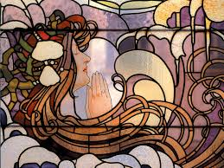

In [ ]:
from PIL import Image
img = Image.open(f'Art Nouveau.jpg')
img.thumbnail((224,224))
img

In [ ]:
recognize_image(img)

{'Art Nouveau': 0.999980092048645,
 'Constructivism Art': 3.581120111562086e-08,
 'Cubism Art': 5.082507868792163e-06,
 'Dadaism Art': 8.201993182410661e-07,
 'Fauvism Art': 6.737728313055413e-07,
 'Gothic Art': 6.75285207307752e-07,
 'Minimalism Art': 1.575264718667313e-07,
 'Pointillism Art': 2.2495997598070971e-07,
 'Pop Art': 1.1605121471802704e-05,
 'Prehistoric Art': 6.758876338608388e-07}

In [ ]:
image = gr.Image()
label = gr.Label()
example = [
    'Constructivism art.jpg',
    'Fauvism art.jpg',
    'Gothic art.jpeg',
    'Minimalistic art.jpg'
]

In [ ]:
iface = gr.Interface(fn = recognize_image, inputs = image, outputs = label, examples = example)
iface.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5b2a41b827ca8bd747.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
